In [1]:
## Adjust Maximum Displacement such that 50% of the models will be accepted


# Corrected Pressure
def Pcor(R, rho, sig, eps):
    sig3 = sig*sqrt(sig2)
    ri3 = sig3/(r^3)
    corp = 4*Pi*eps4*rho^2*sig3*( 2*ri3^3/9 - ri3/3)
    return corp

# Corrected Energy
def Ucor( R, rho):
    sig3 = sig*sqrt(sig2)
    ri3 = sig3/(r^3)
    coru = 2*Pi*eps4*rho*sig3*( ri3^3/9 - ri3/3)
    return coru

def Ui(En, Vir, R2):
    if (R2 <= Rc2):
        r2i = sig2/R2
        r6i = r2i*r2i*r2i
        if shift:
            En = eps4*(r6i*r6i-r6i) - ECUT
        else:
            En = eps4*(r6i*r6i-r6i)
        Vir = eps48*(r6i*r6i-0.5*r6i)
    else:
        En = 0
        Vir = 0
    return En, Vir

def Up(Xi, Yi, Zi, I, Jb, En, Vir):
    En = 0
    Vir = 0
    for j in range(0,Jb):
        if (j != I ):
            dx = Xi - X(j)
            dy = Yi - Y(j)
            dz = Zi - Z(j)
            if (dx > HBOX):
                dx = dx-BOX
            elif (dx < -HBOX):
                dx = dx + BOX
                
            if (dy> HBOX):
                dy = dy-BOX
            elif (dy < -HBOX):
                dy = dy + BOX
            if (dz > HBOX):
                dz = dz-BOX
            elif (dz < -HBOX):
                dz = dz + BOX
            r2 = dx*dx + dy*dy + dz*dz
            
            eni, viri = Ui(En, Vir, r2)
            En = En + eni
            Vir = Vir + viri

zz =

def exch(En, Vir, Attempt, Nacc, Iseed):
    Attempt = Attempt + 1
    vol = BOX*BOX*BOX
    rhoo = NPART/vol
    
    if (random(Iseed) < 0.5):
        add()
    else:
        remove()

def add():
    xn = randi(Iseed)*BOX
    yn = randi(Iseed)*BOX
    zn = randi(Iseed)*BOX
    o = NPART + 1
    jb = 1
    
    eni, viri = UI()
    if tailcor:
        eni = eni + ((NPART+1)*Ucor(RC,rhon)-NPAR*Ucor(RC,rhoo))
    
    arg = ZZ*vol*exp(-beta*eni)/(NPART + 1)
    
    if (randi(Iseed) < arg):
        Nacc = Nacc +1
        En = En + eni
        Vir = Vir + viri
        Npart = Npart + 1
        if (Npart > NPMax):
            error()
        X[Npart] = xn
        Y[Npart] = yn
        z[Npart] = zn

def remove():
    if (Npart == 0):
        return
    o = random(Iseed)*Npart + 1
    jb = 1
    eni, viri = Ui( x,y,z[o])
    eni = -eni
    viri = -viri
    if tailcor:
        rhon = (Npart-1)/vol
        eni = eni + ((Npart-1)*Ucor(RC,rhon)-Npart*Ucor(RC,rhoo))
    arg = Npart*exp( -beta*eni)/(ZZ*vol)
    
    if (random(Iseed)<arg):
        Nacc = Nacc + 1
        En = En + eni
        Vir = Vir + viri
        X[o] = X[Npart]
        Y[o] = Y[Npart]
        Z[o] = Z[Npart]
        Npart = Npart - 1

P = ... #Imposed Pressue Ideal Gas
Npmax = 10000
eps4 = 4*epsilon
eps48 = 48*epsilon
epsilon =  ... #LJ energy parameter
sig2 = sigma*sigma
sigma = ... #LJ energy parameter
mass = ... #Mass of molecules?
rc = ... #cutoff radius
rc2 = rc*rc
ecut = ... #energy at cutoff radius
tailco = ... #apply tail corrections
shift = #shift potential

N_equil = ... #num equilibration cycles
N_prod = ... #num production cycles
n_sample = ... #sample frequency
iseed = ... #random seed
dr = ...#maximum displacement (only for lattuce)
N_displ = ... #num attempts to displace a particle per cycle
n_exhange = ... #num attempts to exchance particles per cycle
n_part = ...#Total number of particles
rho = ... #Initial density
pid = ... #Ideal gas pressure of reservoir

if ibeg:
    lattice()
else:

beta = 1/Temp
mub =  ln( beta*pid*Lambda^3)/beta
zz = beta*pid
muex = ln(zz)/beta - ln(rho)
ZZ = beta*pid
Pi = 4*atan(1)

Rc = min( RC,HBOX)
Rc2 = Rc*Rc

def mc_grand():
    nmoves = ndispl + nexch
    En, Vir = Utot()
    
    ### Equilibration Step
    ncycl = nequil
    attempt = 0; nacc = 0; nacc = 0; atte = 0;
    rhoav = 0; nsampav = 0;
    Adjust()
    for icycl in range(0,cycle):
        for imove in range(0,nmoves):
            ran = random(Iseed)*nmoves
            if (ran < ndispl):
                mc_move()
            else:
                mc_exchange()
    
    ### Production Step
    ncycl = nprod
    attempt = 0; nacc = 0; nacc = 0; atte = 0;
    rhoav = 0; nsampav = 0;
    Adjust()
    for icycl in range(0,cycle):
        for imove in range(0,nmoves):
            ran = random(Iseed)*nmoves
            if (ran < ndispl):
                mc_move()
            else:
                mc_exchange()
        if (icycl%nsamp == 0):
            Sample()
            nsampav = nsampav + 1
            rhoav = rhoav + Npart/(BOX*BOX*BOX)
        if (icycl%(ncycl/5) == 0):
            print( 'Done ' + icycl + " out of " + ncycl )
            store()
            adjust()
    if (ncycl != 0 ):
        if (attempt != 0 ):
            print( attempt, nacc, nacc/attempt)
        if (atte != 0):
            print( atte, acce, acce/atte)
        Ut, Vt = Utot()
        if (abs( Ut - En ) > Etol):
            Panic("Energy")
        if (abs( Vt - Vir) > Etol):
            Panic("Virial")
        if (rhoav != 0 & nsampav !=0):
            muex = log(ZZ)/beta - log(rhoav/nsampav)/beta
            mu = muex + log( rhoav/nsampav)/beta

In [65]:
from random import random, seed
from math import floor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [114]:
# Define Simulation Properties
Nh_max = 20
seed = 1729
tailcor = False

In [115]:
# Define Useful Constants
s_hh = 2.958 # sigma [A]
e_hh = 36.7 # eps over kb[K]
s_hc = 3.216 # sigma [A]
e_hc = 41.924 # eps over kb[K]

kb = 1.3806*10**(-23) #[Pa*m^3/K]
c_bond = 1.54/s_hh #[]

In [142]:
# Define System Properties
Pid = 1 #[]
T = 1 #[]
Vol = 180 #[]
global Nh 
Nh = 10

In [143]:
# Computed Properties
s_box = Vol**(1/3) #[]
beta = 1/T
rc = min([2.5*s_hh,0.5*s_box])
ZZ = beta*Pid

In [160]:
UT = 0
VirT = 0

In [144]:
def load_h(Nh, s_box, Nh_max):
    X = [0]*Nh_max; Y=[0]*Nh_max; Z=[0]*Nh_max;
    for i in range(Nh ):
        X[i] = random()*s_box
        Y[i] = random()*s_box
        Z[i] = random()*s_box
    return X,Y,Z

X,Y,Z = rand_load( Nh, s_box, Nh_max)

In [145]:
def move(o, x, y, z):
    X[o] = x
    Y[o] = y
    Z[o] = z
def add(x, y, z):
    X[Nh] = x
    Y[Nh] = y
    Z[Nh] = z
def remove(o):
    X[o] = X[Nh-1]
    Y[o] = Y[Nh-1]
    Z[o] = Z[Nh-1]

In [146]:
def get_h(N):
    return X[:N], Y[:N], Z[:N]

In [147]:
def dist_hi(x,y,z,j):
    dx = x - X[j]
    dy = y - Y[j]
    dz = z - Z[j]
    if (dx > 0.5*s_box):
        dx = dx-s_box
    elif (dx < -0.5*s_box):
        dx = dx + s_box
    if (dy > 0.5*s_box):
        dy = dy-s_box
    elif (dy < -0.5*s_box):
        dy = dy + s_box
    if (dz > 0.5*s_box):
        dz = dz-s_box
    elif (dz < -0.5*s_box):
        dz = dz + s_box
    return dx*dx + dy*dy + dz*dz

def dist_ci(x,y,z,j):
    dx = x - Xc[j]
    dy = y - Yc[j]
    dz = z - Zc[j]
    if (dx > 0.5*s_box):
        dx = dx-s_box
    elif (dx < -0.5*s_box):
        dx = dx + s_box
    if (dy > 0.5*s_box):
        dy = dy-s_box
    elif (dy < -0.5*s_box):
        dy = dy + s_box
    if (dz > 0.5*s_box):
        dz = dz-s_box
    elif (dz < -0.5*s_box):
        dz = dz + s_box
    return dx*dx + dy*dy + dz*dz

In [148]:
def dist_h(x,y,z):
    r2h = [0]*Nh
    for i in range(Nh):
        r2h[i] = dist_hi( x,y,z,i )
    return r2h

def dist_c(x,y,z):
    r2c = [0]*Nc
    for i in range(Nc):
        r2c[i] = dist_ci(x,y,z,i)
    return r2c

In [149]:
def Ui(r2, eps, sig):
    if (r2 <= rc*rc):
        r2i = sig*sig/r2
        r6i = r2i*r2i*r2i
        En = 4*eps*(r6i*r6i-r6i)
        Vir = 48*eps*(r6i*r6i-0.5*r6i)
    else:
        En = 0
        Vir = 0
    return En, Vir

In [150]:
def Up( x, y, z, ia):
    En_move = 0
    Vir_move = 0
    for i in range(Nh):
        if ( i != ia):
            r2 = dist_hi( x,y,z, i)
            ui, viri = Ui( r2, e_hh, s_hh)
            En_move = En_move + ui
            Vir_move = Vir_move + viri
    for ic in range(Nc):
        r2 = dist_ci( x,y,z, ic)
        ui, viri = Ui( r2, e_hc, s_hc)
        En_move = En_move + ui
        Vir_move = Vir_move + viri
    return En_move, Vir_move

In [151]:
def mc_add():
    # Select Random location
    x = random()*s_box
    y = random()*s_box
    z = random()*s_box
    
    #Calculate Energy of Trial Move
    U_move, Vir_move = Up(x,y,z,Nh+1)
    if tailcor:
        U_move = U_move + (Nh+1)*Ucor(rc,(Nh+1)/Vol) - Nh*Ucor(rc, Nh/Vol)
        
    # Probability of accepting trial move
    pa_add = ZZ*Vol*exp( -beta*U_move )/(Nh + 1)
    
    # Accept or Decline the Trial move
    if (random() < pa_add):
        add(x,y,z)
        UT = UT + U_move
        VirT = VirT + Vir_move
        Nh = Nh + 1
        Nacc = Nacc + 1
        if (Nh > Nh_max):
            Panic()

In [152]:
def mc_remove():
    global Nh
    if (Nh == 0):
        return
    
    # Select Random particle
    o = floor( random()*20 )
    x = X[o]
    y = Y[o]
    z = Z[o]
    
    # Calculate Energy of Trial Move
    U_move, Vir_move = Up( x,y,z, o)
    U_move = -U_move
    Vir_move = -Vir_move
    if tailcor:
        U_move = U_move + ((Nh-1)*Ucor(rc,(Nh-1)/Vol)-Nh*Ucor(rc,Nh/Vol))
    
    # Probability of Accepting Trial Move
    pa_remove = Nh*np.exp( -beta*U_move )/(ZZ*Vol)
    
    # Accept or Decline Trial Move
    if (random() < pa_remove):
        remove(o)
        UT = UT + U_move
        VirT = VirT + Vir_move
        Nh = Nh - 1
        Nacc = Nacc + 1
        if (Nh > Nh_max):
            Panic()

In [153]:
def mc_move():
    if (Nh == 0):
        return
    

In [154]:
def load_c():
    Nci = floor( s_box/c_bond )
    Nc = 3*Nci
    Xc = [0]*Nc
    Yc = [0]*Nc
    Zc = [0]*Nc
    for i in range(Nci):
        Xc[i] = c_bond*i + 0.02
        Yc[i] = s_box/2
        Zc[i] = s_box/2
    for j in range(Nci):
        Xc[Nci + j] = s_box/2
        Yc[Nci + j] = c_bond*j + 0.02
        Zc[Nci + j] = s_box/2
    for k in range(Nci):
        Xc[2*Nci + k] = s_box/2
        Yc[2*Nci + k] = s_box/2
        Zc[2*Nci + k] = c_bond*k + 0.02
    return Xc, Yc, Zc, Nc

In [155]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

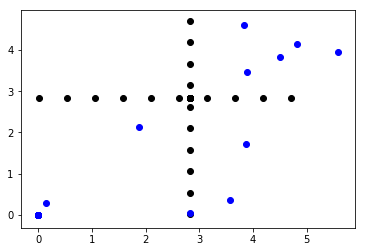

In [156]:
Xc, Yc, Zc, Nc = load_c()
X,Y,Z = load_h( Nh, s_box, Nh_max)

plt.scatter( Xc, Yc, c="k")
plt.scatter( X, Y, c="b")

In [157]:
add( 1.4,2.4,3.4)
Nh = Nh + 1

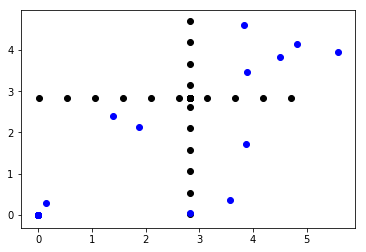

In [158]:
plt.scatter( Xc, Yc, c="k")
plt.scatter( X, Y, c="b")

In [161]:
mc_remove()

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


UnboundLocalError: local variable 'UT' referenced before assignment

In [24]:
y = 1

In [26]:
def inc_y():
    global y
    y = y+1
    print(y)

In [27]:
inc_y()

2


In [17]:
def dec_y():
    y = y-1
    print(y)

In [22]:
dec_y()

UnboundLocalError: local variable 'y' referenced before assignment

In [28]:
y

2

In [30]:
def init():
    global x
    x= 1

In [31]:
init()

In [32]:
x

1